# PageRank

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

## Example: Small graph

Create a directed graph with 4 vertices:

In [2]:
G1 = nx.DiGraph([(1,2),(2,1),(3,1),(3,2),(3,4),(2,4),(4,2)])

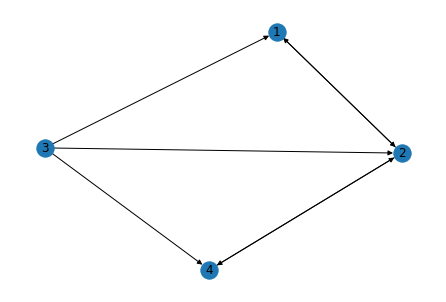

In [3]:
nx.draw(G1,with_labels=True)

Create the adjacency matrix for $G$ and note that our definition of adjacency matrix is the transpose of the definition used by `networkx`.

In [4]:
A1 = nx.adjacency_matrix(G1).toarray().T
A1

/var/folders/2h/25vcwmr52mvfqs1h92028rph0000gn/T/ipykernel_6041/2958485236.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).toarray().T


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

Create the stochastic matrix:

In [ ]:
P1 = A1 / A1.sum(axis=0)
P1

Create the Google matrix:

In [ ]:
alpha=0.85
M1 = alpha*P1 + (1-alpha)*(1/4)*np.ones((4,4))
M1

Perform 50 iterations of the power method to find the PageRank vector:

In [ ]:
x1 = np.array([1,0,0,0])
for k in range(0,50):
    x1 = M1@x1

In [ ]:
x1

Compare to the networkx functions:

In [ ]:
nx.google_matrix(G1).T

In [ ]:
nx.pagerank(G1)

In [ ]:
nx.draw(G1,node_color=x1,cmap='winter',with_labels=True)

## Example: Random graph

In [ ]:
n_pages = 20
n_links = 100
edges = [(np.random.randint(n_pages),np.random.randint(n_pages)) for _ in range(0,n_links)]
G2 = nx.DiGraph(edges)

In [ ]:
nx.draw(G2,pos=nx.spring_layout(G2),with_labels=True)

In [ ]:
A2 = nx.adjacency_matrix(G2).toarray().T
P2 = A2 / A2.sum(axis=0)
alpha=0.85
M2 = alpha*P2 + (1-alpha)*(1/n_pages)*np.ones((n_pages,n_pages))
x2 = np.zeros(n_pages)
x2[0] = 1
for k in range(0,50):
    x2 = M2@x2

In [ ]:
nx.draw(G2,node_color=x2,cmap='winter',with_labels=True)

In [ ]:
x2

In [ ]:
nx.pagerank(G2)